# 3. Transformacion de datos

In [83]:
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

## 3.1 Analizar muestras

In [2]:
"""importar datos"""
df_normal = pd.read_csv('../../araData/normal_sinan.csv',low_memory=False)
df_dos = pd.read_csv('../../araData/dos_sinan.csv',low_memory=False)
df_probe = pd.read_csv('../../araData/probe_sinan.csv',low_memory=False)

In [67]:
"""concatenar datos"""
df_traffic = pd.concat([df_dos, df_normal, df_probe], axis=0)
"""sumar clases"""
cantidad = df_traffic['Label'].value_counts().rename_axis('Trafico').reset_index(name='Flujos')

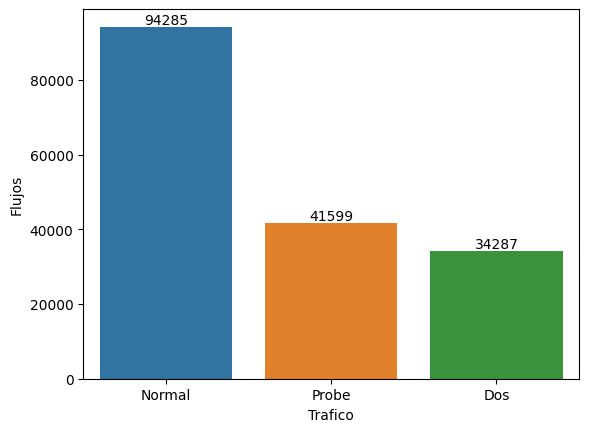

In [32]:
ax = sns.barplot(x='Trafico', y='Flujos', data=cantidad)
ax.bar_label(ax.containers[0])
plt.savefig('cantidad_clasestrafico.png')


In [58]:
df_traffic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170171 entries, 0 to 41598
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RunTime     170171 non-null  float64
 1   Dur         170171 non-null  float64
 2   SrcDur      170171 non-null  float64
 3   DstDur      170171 non-null  float64
 4   Mean        170171 non-null  float64
 5   StdDev      170171 non-null  float64
 6   Sum         170171 non-null  float64
 7   Min         170171 non-null  float64
 8   Max         170171 non-null  float64
 9   Dir         170171 non-null  object 
 10  Proto       170171 non-null  object 
 11  Dport       170171 non-null  object 
 12  Cause       170171 non-null  object 
 13  TotPkts     170171 non-null  int64  
 14  SrcPkts     170171 non-null  int64  
 15  DstPkts     170171 non-null  int64  
 16  TotBytes    170171 non-null  int64  
 17  SrcBytes    170171 non-null  int64  
 18  DstBytes    170171 non-null  int64  
 19  Tot

In [34]:
df_traffic.describe()

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,TotPkts,...,pDstRetr,Rate,SrcRate,DstRate,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz
count,170171.000000,170171.000000,170171.000000,170171.000000,170171.000000,170171.0,170171.000000,170171.000000,170171.000000,170171.000000,...,170171.0,170171.000000,170171.000000,170171.000000,170171.000000,170171.000000,170171.000000,170171.000000,170171.000000,170171.000000
mean,2.450317,2.450317,2.436882,2.138709,2.450317,0.0,2.450317,2.450317,2.450317,36.236915,...,0.0,454.454423,42.729800,86.881694,126.081872,301.978890,440.558380,1040.448143,65.587809,139.110107
std,5.292768,5.292768,5.281517,5.156683,5.292768,0.0,5.292768,5.292768,5.292768,591.621320,...,0.0,3944.540734,752.335735,5143.243923,190.777351,576.188719,1265.828846,4653.353344,16.277882,141.418712
min,0.000002,0.000002,0.000000,0.000000,0.000002,0.0,0.000002,0.000002,0.000002,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003183,0.003183,0.000000,0.000000,0.003183,0.0,0.003183,0.003183,0.003183,2.000000,...,0.0,11.094392,0.000000,0.000000,64.000000,54.000000,70.000000,54.000000,54.000000,54.000000
50%,0.007464,0.007464,0.000000,0.000000,0.007464,0.0,0.007464,0.007464,0.007464,2.000000,...,0.0,218.766815,0.000000,0.000000,75.000000,186.000000,80.000000,311.000000,66.000000,60.000000
75%,1.043584,1.043584,1.024220,0.058096,1.043584,0.0,1.043584,1.043584,1.043584,12.000000,...,0.0,343.878937,4.367462,17.172606,107.500000,382.666656,336.000000,543.000000,74.000000,186.000000
max,19.999998,19.999998,19.999998,19.999998,19.999998,0.0,19.999998,19.999998,19.999998,100777.000000,...,0.0,500000.000000,181818.187500,1000000.000000,4577.167480,47301.550781,65226.000000,65226.000000,1048.000000,1739.000000


## 3.2 Datos Categoricos

Atributos no numericos: Dir, Proto, Dport, Cause, State

In [35]:
""" funcion para encontrar valores unicos de las caracteristicas """
def valores_unicos(_dataframe:pd.DataFrame,_caracteristicas:list):
    assert type(_dataframe)==pd.DataFrame, "Tipo de dato incorrecto"
    assert type(_caracteristicas)==list, "Tipo de dato incorrecto"
    """ recorrer lista de características """
    for i in _caracteristicas:
        """mostrar valores """
        display(i, _dataframe[i].unique())

In [59]:
no_numericos = ['Dir', 'Proto', 'Dport', 'Cause', 'State', 'Label']
valores_unicos(df_traffic,no_numericos)

'Dir'

array(['   ->', '  <?>', '  <->'], dtype=object)

'Proto'

array(['tcp', 'udp', 'icmp'], dtype=object)

'Dport'

array(['http', '40532', '6653', ..., '0xcf05', '0xeaad', '0xaf96'],
      dtype=object)

'Cause'

array(['Start', 'Status', 'Stop'], dtype=object)

'State'

array(['FIN', 'CON', 'REQ', 'RST', 'ACC', 'INT', 'URP', 'CLO', 'URN',
       'ECO', 'URO'], dtype=object)

'Label'

array(['Dos', 'Normal', 'Probe'], dtype=object)

In [39]:
for i in df_traffic.Dport.unique():
    print(i)

http
40532
6653
1900
40634
mdns
80
0x5000
48312
48312.0
6653.0
48308
https
domain
53592
netbios-ns
hostmon
netbios-dgm
22790
57706
ssh
8612
8610
47008
telnet
53542
53576
mysql
0x0808
34750
0x88a5
0x0608
0x50a2
0xb78a
1025
1720
5900
ftp
sunrpc
submission
imap2
http-alt
microsoft-ds
pop3s
smux
ms-wbt-server
smtp
8888
auth
imaps
1723
256
pop3
epmap
netbios-ssn
rtsp
27715
5960
2920
2144
3766
1057
5802
49152
3372
1092
exec
8093
1030
9220
5862
1839
125
16080
3809
1688
4449
8022
1234
146
ldap
6156
1277
9917
1174
666
10025
425
24800
4126
50006
2557
5050
32768
900
2383
5988
1034
1218
2702
8652
32779
33899
1104
6101
printer
62078
3827
1100
3801
4998
1112
50003
6692
2022
1334
28201
1095
35500
211
2035
1974
1443
5901
1455
8873
omniorb
33
5440
3986
3077
ospfapi
1503
17988
61532
6580
1233
8193
5544
1049
8292
1666
20828
2047
3300
1068
8011
691
5009
1126
14441
5002
2065
1138
1085
5679
8009
10778
2033
5633
1027
545
5877
56737
2048
2998
5101
8383
3703
1054
2968
14238
1089
6502
1121
2007
1783
9503
6668
2

In [72]:
df_traffic.replace({'  <?>': 0, '   ->': 1 , '  <->': 2}, inplace=True)
df_traffic.replace({'tcp': 0, 'udp' : 1 , 'icmp': 2}, inplace=True)
df_traffic.replace({'Start':0, 'Status': 1 , 'Stop': 2}, inplace=True)
df_traffic.replace({'FIN': 0, 'CON': 1, 'REQ': 2, 'RST': 3, 'ACC': 4, 'INT': 5, 'URP' : 6, 'CLO':7, 'URN':8, 'ECO':9, 'URO':10}, inplace=True)
df_traffic.replace({'Dos':0, 'Normal': 1 , 'Probe':2}, inplace=True)

In [ ]:
"""cambiar a tipo de datos categoricos"""
df_traffic.loc[:, df_traffic.dtypes == 'object'] = df_traffic.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [41]:
puertosDestino = df_traffic.Dport.value_counts()

In [79]:
df_traffic.Label.astype('category')

0        0
1        0
2        0
3        0
4        0
        ..
41594    2
41595    2
41596    2
41597    2
41598    2
Name: Label, Length: 170171, dtype: category
Categories (3, int64): [0, 1, 2]

In [90]:
df_traffic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170171 entries, 0 to 41598
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RunTime     170171 non-null  float64
 1   Dur         170171 non-null  float64
 2   SrcDur      170171 non-null  float64
 3   DstDur      170171 non-null  float64
 4   Mean        170171 non-null  float64
 5   StdDev      170171 non-null  float64
 6   Sum         170171 non-null  float64
 7   Min         170171 non-null  float64
 8   Max         170171 non-null  float64
 9   Dir         170171 non-null  int64  
 10  Proto       170171 non-null  int64  
 11  Cause       170171 non-null  int64  
 12  TotPkts     170171 non-null  int64  
 13  SrcPkts     170171 non-null  int64  
 14  DstPkts     170171 non-null  int64  
 15  TotBytes    170171 non-null  int64  
 16  SrcBytes    170171 non-null  int64  
 17  DstBytes    170171 non-null  int64  
 18  TotAppByte  170171 non-null  int64  
 19  SAp

In [82]:
df_traffic.to_csv('../../araData/bdd_transformacion.csv',index=False)

In [88]:
df_traffic.drop(columns=['Dport'], axis=1, inplace=True)

## 3.2 Reduccion de caracteristicas

In [91]:
X = df_traffic.iloc[:, 0:46]
y = df_traffic.iloc[:, 46]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.02143616 0.02464183 0.0280631  0.04414909 0.03156721 0.
 0.03060772 0.0201547  0.03129472 0.15388424 0.0898294  0.06290093
 0.02264126 0.01731948 0.01658905 0.00817098 0.01577328 0.01202175
 0.0092001  0.01388156 0.0053058  0.00375676 0.00389216 0.00215551
 0.00436475 0.00669865 0.00032562 0.01083849 0.0169595  0.00051291
 0.         0.         0.         0.         0.         0.
 0.00294266 0.00585928 0.00778777 0.10595321 0.00893903 0.02474956
 0.01881497 0.03030935 0.02149958 0.06420788]


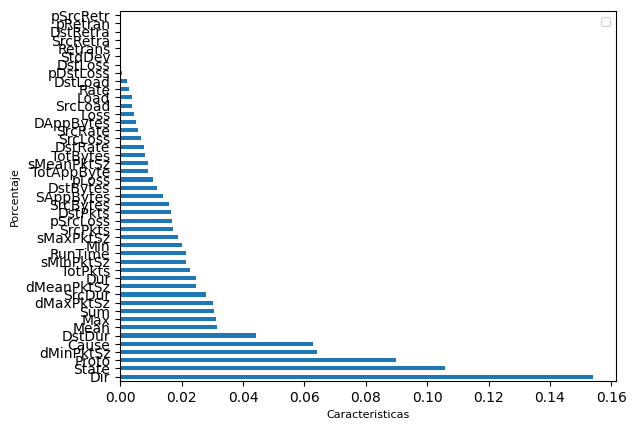

In [95]:
m_extract_features = ExtraTreesClassifier()
m_extract_features.fit(X,y)
print(m_extract_features.feature_importances_)
feat_importances = pd.Series(m_extract_features.feature_importances_, index=X.columns)
feat_importances.nlargest(45).plot(kind='barh')
plt.xlabel('Caracteristicas', fontsize = 8)
plt.ylabel('Porcentaje', fontsize = 8)
plt.legend(fontsize="small")
plt.savefig('ExtraTreesClassifier_2.png')
plt.show()